# <font color='red'>Exam Instructions :</font>   <br>

<font color='red'>
    1. You will be given <b>3 Hour</b> to complete this case study. <br>
    2. It is an open test i.e. you are allowed to use notes/google but you are not allowed to discuss with your classmates.<br>
    3. If more than 30% of your code is found matching with any other classmate you both will be failed. We will use hacker ranks's palagrism to check this as was shown in demo. <br>
    4. Your notebook name must be your CDAC Full_PRN_Number only. (use your id card as refrence ,if required)<br>
    5. For final submission you will have to submit 2 files (use "download as" option of jupyter notebook) <br>
            <p style="padding-left: 150px;">1) .ipnyb file with output </p>
            <p style="padding-left: 150px;">2) .py file</p><br>
    6. Create a folder name Your_Full_PRN_Number and upload both files(.ipnyb and .py) in
    given link <br></font> 

# Case Study -  Predict whether an employee will leave  the Company or Not

Predict whether an employee will leave the "Company" based on various features such as number of projects they worked on, time spent at the company, last performance review, salary etc. The dataset has around 15,000 rows and 9 columns. The column you need to predict is called "left". It's a binary column with 0/1 values. The label 1 means that the employee has left.

Solve the case study by follwoing two approaches :

    1. Any one traditional machine learning algorithm.
    2. Any deep learning algorithm.

# CRISP-DM
You're going to follow the CRISP-DM process to investigate and prepare this data for further work.

    1. Business Understanding - Write down your business understanding of your case study in layman terms.
    2. Data Understanding - What's your insight from provided dataset
    3. Data Preparation - What steps did you take to prepare data and why? (Feature Engineering)
    4. Modelling - Which model/algorithm did you apply and why ?
    5. Evaluating the results - Which matrix and approach did you use to evaluate your model and Why?
    6. Deploying changes - To increase the accuracy did you deploy any changes if yes , what changes did you make ?
    
## Note : Model accuracy should be 85% or more

In [1]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from time import time
from IPython.display import display
import seaborn as sns
from matplotlib import pyplot as plt 
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import SVC 
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Pretty display for notebooks
%matplotlib inline

<h3>1. Loading Raw Data</h3>

In [3]:
full_data = pd.read_csv(r"C:\Users\admin\Desktop\dataset.csv")
full_data.head(2)

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,promotion_last_5years,sales,salary,left
0,0.38,0.53,2,157,3,0,0,sales,low,1.0
1,0.80,0.86,5,262,6,0,0,sales,medium,1.0


<h3>2. Exploratory Data Analysis</h3>

In [4]:
#full_data.shape
full_data.shape[0]

14999

<h3>2.1 Cleaning Data</h3>

In [5]:
full_data.isna().values.any() #checking if data has null values

True

In [6]:
full_data.columns[full_data.isna().any()] #checking which column has null values

Index(['left'], dtype='object')

In [7]:
full_data.left.isna().value_counts()

False    14998
True         1
Name: left, dtype: int64

In [8]:
full_data = full_data.dropna()

In [9]:
full_data.left.isna().value_counts()

False    14998
Name: left, dtype: int64

In [10]:
for i in full_data.columns:
    print("***")
    print(full_data[i].value_counts())
    print("***")

***
0.10    358
0.11    335
0.74    257
0.77    252
0.84    247
0.73    246
0.78    241
0.82    241
0.37    240
0.89    237
0.76    234
0.83    234
0.72    230
0.50    229
0.66    228
0.75    226
0.87    225
0.43    224
0.91    224
0.80    222
0.90    220
0.81    220
0.59    219
0.79    217
0.44    211
0.57    210
0.63    209
0.49    209
0.69    209
0.40    209
       ... 
0.42    155
0.48    149
0.36    139
1.00    111
0.46     95
0.24     80
0.16     79
0.15     76
0.19     74
0.14     73
0.17     72
0.20     69
0.21     67
0.18     63
0.22     60
0.31     59
0.13     54
0.23     54
0.32     50
0.34     48
0.47     42
0.30     39
0.29     38
0.35     37
0.33     36
0.25     34
0.28     31
0.27     30
0.12     30
0.26     30
Name: satisfaction_level, Length: 92, dtype: int64
***
***
0.55    358
0.50    353
0.54    350
0.51    345
0.57    333
0.49    332
0.87    326
0.53    324
0.56    322
0.85    316
0.90    313
0.52    308
0.89    296
0.84    294
0.48    292
0.91    287
1.00    283
0

<h3>2.2 Integration - Visualizing the data for better understanding</h3>

low       7315
medium    6446
high      1237
Name: salary, dtype: int64


(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

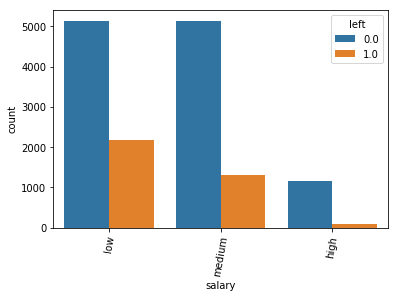

In [11]:
print(full_data.salary.value_counts())
sns.countplot(full_data['salary'],hue=full_data['left'])
plt.xticks(rotation=80)

In [12]:
group1 = full_data[(full_data.average_monthly_hours > 96) & (full_data.average_monthly_hours <= 139)]
group2 = full_data[(full_data.average_monthly_hours > 140) & (full_data.average_monthly_hours <= 182)]
group3 = full_data[(full_data.average_monthly_hours > 183) & (full_data.average_monthly_hours <= 225)]
group4 = full_data[(full_data.average_monthly_hours > 226) & (full_                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            ,ḥṅ hhhhw22222222222hhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhdata.average_monthly_hours <= 268)]
group5 = full_data[(full_data.average_monthly_hours > 269) & (full_data.average_monthly_hours <= 310)]

In [13]:
group1_left = full_data[(full_data.average_monthly_hours > 96) & (full_data.average_monthly_hours <= 139) & (full_data.left == 1.0)]
group2_left = full_data[(full_data.average_monthly_hours > 140) & (full_data.average_monthly_hours <= 182) & (full_data.left == 1.0)]
group3_left = full_data[(full_data.average_monthly_hours > 183) & (full_data.average_monthly_hours <= 225) & (full_data.left == 1.0)]
group4_left = full_data[(full_data.average_monthly_hours > 226) & (full_data.average_monthly_hours <= 268) & (full_data.left == 1.0)]
group5_left = full_data[(full_data.average_monthly_hours > 269) & (full_data.average_monthly_hours <= 310) & (full_data.left == 1.0)]

In [14]:
print('Average Monthly Hours \t Total Peoples \t\t People who left')
print('96 to 139 \t\t',group1.count()[0],'\t\t\t\t',group1_left.count()[0])
print("140 to 182\t\t",group2.count()[0],'\t\t\t\t',group2_left.count()[0])
print("183 to 225\t\t",group3.count()[0],'\t\t\t\t',group3_left.count()[0])
print("226 to 268\t\t",group4.count()[0],'\t\t\t\t',group4_left.count()[0])
print("269 to 310\t\t",group5.count()[0],'\t\t\t\t',group5_left.count()[0])

Average Monthly Hours 	 Total Peoples 		 People who left
96 to 139 		 1721 				 594
140 to 182		 4280 				 989
183 to 225		 3276 				 170
226 to 268		 4051 				 1044
269 to 310		 1256 				 674


Text(0.5, 1.0, 'Trade off between work hours and left')

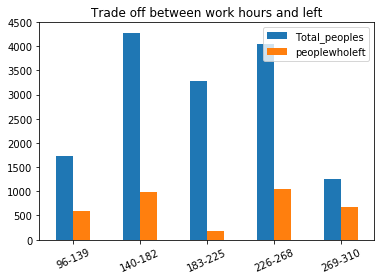

In [15]:
Total_peoples=[1721,4280,3276,4051,1256]
peoplewholeft=[594,989,170,1044,674]
groups=['96-139','140-182','183-225','226-268','269-310']
df=pd.DataFrame({'Total_peoples':Total_peoples,'peoplewholeft':peoplewholeft},index=groups)
df.plot.bar(rot=24)
plt.title('Trade off between work hours and left')

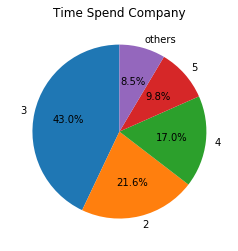

In [87]:
full_data.time_spend_company.value_counts()
plt.title('Time Spend Company')
activities = [3,2,4,5,'others']
relationship = [6442,3244,2557,1473,1282]
plt.pie(relationship, labels=activities,  startangle=90, autopct='%.1f%%')
plt.show()

In [91]:
group1 = full_data[(full_data.satisfaction_level <= 0.10)]
group2 = full_data[(full_data.satisfaction_level > 0.11) & (full_data.satisfaction_level <= 0.20)]
group3 = full_data[(full_data.satisfaction_level > 0.21) & (full_data.satisfaction_level <= 0.30)]
group4 = full_data[(full_data.satisfaction_level > 0.31) & (full_data.satisfaction_level <= 0.40)]
group5 = full_data[(full_data.satisfaction_level > 0.41) & (full_data.satisfaction_level <= 0.50)]
group6 = full_data[(full_data.satisfaction_level > 0.51) & (full_data.satisfaction_level <= 0.60)]
group7 = full_data[(full_data.satisfaction_level > 0.61) & (full_data.satisfaction_level <= 0.70)]
group8 = full_data[(full_data.satisfaction_level > 0.71) & (full_data.satisfaction_level <= 0.80)]
group9 = full_data[(full_data.satisfaction_level > 0.81) & (full_data.satisfaction_level <= 0.90)]
group10 = full_data[(full_data.satisfaction_level > 0.91) & (full_data.satisfaction_level <= 1.0)]

In [92]:
group1_left = full_data[(full_data.satisfaction_level <= 0.10) & (full_data.left == 1.0)]
group2_left = full_data[(full_data.satisfaction_level > 0.11) & (full_data.satisfaction_level <= 0.20) & (full_data.left == 1.0)]
group3_left = full_data[(full_data.satisfaction_level > 0.21) & (full_data.satisfaction_level <= 0.30) & (full_data.left == 1.0)]
group4_left = full_data[(full_data.satisfaction_level > 0.31) & (full_data.satisfaction_level <= 0.40) & (full_data.left == 1.0)]
group5_left = full_data[(full_data.satisfaction_level > 0.41) & (full_data.satisfaction_level <= 0.50) & (full_data.left == 1.0)]
group6_left = full_data[(full_data.satisfaction_level > 0.51) & (full_data.satisfaction_level <= 0.60) & (full_data.left == 1.0)]
group7_left = full_data[(full_data.satisfaction_level > 0.61) & (full_data.satisfaction_level <= 0.70) & (full_data.left == 1.0)]
group8_left = full_data[(full_data.satisfaction_level > 0.71) & (full_data.satisfaction_level <= 0.80) & (full_data.left == 1.0)]
group9_left = full_data[(full_data.satisfaction_level > 0.81) & (full_data.satisfaction_level <= 0.90) & (full_data.left == 1.0)]
group10_left = full_data[(full_data.satisfaction_level > 0.91) & (full_data.satisfaction_level <= 1.0) & (full_data.left == 1.0)]

In [93]:
print('satisfaction_level \t Total Peoples \t\t People who left')
print('0 to 0.1 \t\t',group1.count()[0],'\t\t\t\t',group1_left.count()[0])
print("0.11 to 0.2\t\t",group2.count()[0],'\t\t\t\t',group2_left.count()[0])
print("0.21 to 0.3\t\t",group3.count()[0],'\t\t\t\t',group3_left.count()[0])
print("0.31 to 0.4\t\t",group4.count()[0],'\t\t\t\t',group4_left.count()[0])
print("0.41 to 0.5\t\t",group5.count()[0],'\t\t\t\t',group5_left.count()[0])
print('0.51 to 0.6 \t\t',group6.count()[0],'\t\t\t\t',group1_left.count()[0])
print("0.61 to 0.7\t\t",group7.count()[0],'\t\t\t\t',group2_left.count()[0])
print("0.71 to 0.8\t\t",group8.count()[0],'\t\t\t\t',group3_left.count()[0])
print("0.81 to 0.9\t\t",group9.count()[0],'\t\t\t\t',group4_left.count()[0])
print("0.91 to 1\t\t",group10.count()[0],'\t\t\t\t',group5_left.count()[0])

satisfaction_level 	 Total Peoples 		 People who left
0 to 0.1 		 553 				 553
0.11 to 0.2		 590 				 36
0.21 to 0.3		 396 				 22
0.31 to 0.4		 1123 				 770
0.41 to 0.5		 1517 				 683
0.51 to 0.6 		 1730 				 553
0.61 to 0.7		 1764 				 36
0.71 to 0.8		 2125 				 22
0.81 to 0.9		 1998 				 770
0.91 to 1		 1560 				 683


Text(0.5, 1.0, 'Trade off between satisfaction level and left')

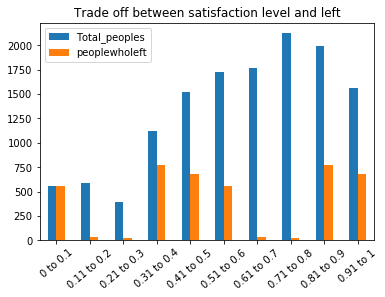

In [106]:
Total_peoples=[553,590,396,1123,1517,1730,1764,2125,1998,1560]
peoplewholeft=[553,36,22,770,683,553,36,22,770,683]
groups=['0 to 0.1','0.11 to 0.2','0.21 to 0.3','0.31 to 0.4','0.41 to 0.5','0.51 to 0.6','0.61 to 0.7','0.71 to 0.8','0.81 to 0.9','0.91 to 1']
df=pd.DataFrame({'Total_peoples':Total_peoples,'peoplewholeft':peoplewholeft},index=groups)
df.plot.bar(rot=40)
plt.title('Trade off between satisfaction level and left')

In [102]:
group1 = full_data[(full_data.number_project == 2)]
group2 = full_data[(full_data.number_project == 3)]
group3 = full_data[(full_data.number_project == 4)]
group4 = full_data[(full_data.number_project == 5)]
group5 = full_data[(full_data.number_project == 6)]
group6 = full_data[(full_data.number_project == 7)]

In [103]:
group1_left = full_data[(full_data.number_project == 2) & (full_data.left == 1.0)]
group2_left = full_data[(full_data.number_project == 3) & (full_data.left == 1.0)]
group3_left = full_data[(full_data.number_project == 4) & (full_data.left == 1.0)]
group4_left = full_data[(full_data.number_project == 5) & (full_data.left == 1.0)]
group5_left = full_data[(full_data.number_project == 6) & (full_data.left == 1.0)]
group6_left = full_data[(full_data.number_project == 7) & (full_data.left == 1.0)]

In [105]:
print('number_project \t Total Peoples \t\t People who left')
print('2\t\t',group1.count()[0],'\t\t\t\t',group1_left.count()[0])
print("3\t\t",group2.count()[0],'\t\t\t\t',group2_left.count()[0])
print("4\t\t",group3.count()[0],'\t\t\t\t',group3_left.count()[0])
print("5\t\t",group4.count()[0],'\t\t\t\t',group4_left.count()[0])
print("6\t\t",group5.count()[0],'\t\t\t\t',group5_left.count()[0])
print("7\t\t",group6.count()[0],'\t\t\t\t',group6_left.count()[0])

number_project 	 Total Peoples 		 People who left
2		 2387 				 1566
3		 4055 				 72
4		 4365 				 409
5		 2761 				 612
6		 1174 				 655
7		 256 				 256


Text(0.5, 1.0, 'Trade off between project number and left')

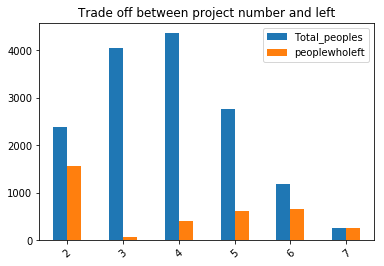

In [110]:
Total_peoples=[2387,4055,4365,2761,1174,256]
peoplewholeft=[1566,72,409,612,655,256]
groups=[2,3,4,5,6,7]
df=pd.DataFrame({'Total_peoples':Total_peoples,'peoplewholeft':peoplewholeft},index=groups)
df.plot.bar(rot=40)
plt.title('Trade off between project number and left')

In [118]:
group1 = full_data[(full_data.last_evaluation > 0.36) & (full_data.last_evaluation <= 0.52)]
group2 = full_data[(full_data.last_evaluation > 0.53) & (full_data.last_evaluation <= 0.68)]
group3 = full_data[(full_data.last_evaluation > 0.69) & (full_data.last_evaluation <= 0.84)]
group4 = full_data[(full_data.last_evaluation > 0.85) & (full_data.last_evaluation <= 1)]

In [120]:
group1_left = full_data[(full_data.last_evaluation > 0.36) & (full_data.last_evaluation <= 0.52) & (full_data.left == 1.0)]
group2_left = full_data[(full_data.last_evaluation > 0.53) & (full_data.last_evaluation <= 0.68) & (full_data.left == 1.0)]
group3_left = full_data[(full_data.last_evaluation > 0.69) & (full_data.last_evaluation <= 0.84) & (full_data.left == 1.0)]
group4_left = full_data[(full_data.last_evaluation > 0.85) & (full_data.last_evaluation <= 1) & (full_data.left == 1.0)]

In [124]:
print('last_evaluation \t Total Peoples \t\t People who left')
print('0.36 to 0.52\t\t',group1.count()[0],'\t\t\t\t',group1_left.count()[0])
print("0.53 to 0.68 \t\t",group2.count()[0],'\t\t\t\t',group2_left.count()[0])
print("0.69 to 0.85\t\t",group3.count()[0],'\t\t\t\t',group3_left.count()[0])
print("0.86 to 1\t\t",group4.count()[0],'\t\t\t\t',group4_left.count()[0])

last_evaluation 	 Total Peoples 		 People who left
0.36 to 0.52		 2884 				 1476
0.53 to 0.68 		 2913 				 65
0.69 to 0.85		 3443 				 612
0.86 to 1		 2853 				 295


Text(0.5, 1.0, 'Trade off between last_evaluation number and left')

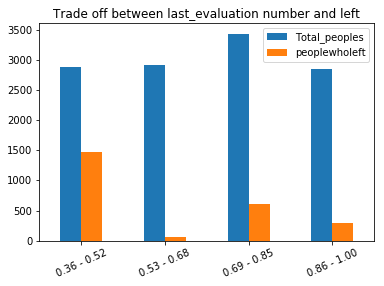

In [125]:
Total_peoples=[2884,2913,3443,2853]
peoplewholeft=[1476,65,612,295]
groups=['0.36 - 0.52','0.53 - 0.68','0.69 - 0.85','0.86 - 1.00']
df=pd.DataFrame({'Total_peoples':Total_peoples,'peoplewholeft':peoplewholeft},index=groups)
df.plot.bar(rot=24)
plt.title('Trade off between last_evaluation number and left')

<h3>2.3 Transforming the data</h3>

In [16]:
le = LabelEncoder()

In [17]:
full_data.sales = le.fit_transform(full_data['sales'])
full_data.salary = le.fit_transform(full_data['salary'])
full_data.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,promotion_last_5years,sales,salary,left
0,0.38,0.53,2,157,3,0,0,7,1,1.0
1,0.80,0.86,5,262,6,0,0,7,2,1.0
2,0.11,0.88,7,272,4,0,0,7,2,1.0
3,0.72,0.87,5,223,5,0,0,7,1,1.0
4,0.37,0.52,2,159,3,0,0,7,1,1.0


<h3>2.4 Feature Engineering</h3>
</br>
<b>Using PCA to optimize the model</b>
</br>
Principal component analysis (PCA) is a statistical procedure that uses an orthogonal transformation to convert a set of observations of possibly correlated variables (entities each of which takes on various numerical values) into a set of values of linearly uncorrelated variables called principal components

<h3>3. Data Splitting - Training and Testing data</h3>

In [18]:
y = full_data.left
X = full_data.drop('left',1)

In [19]:
# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size = 0.2, 
                                                    random_state = 0)
# create training and testing vars
print ("Total dataset - ", X.shape, y.shape)
print ("Training dataset - ", X_train.shape, y_train.shape)
print ("Testing dataset - ", X_test.shape, y_test.shape)

Total dataset -  (14998, 9) (14998,)
Training dataset -  (11998, 9) (11998,)
Testing dataset -  (3000, 9) (3000,)


<h3>4. Model Training</h3>

In [20]:
model = SVC() 
model.fit(X_train, y_train) 

# print prediction results 
predictions = model.predict(X_test) 
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

         0.0       0.77      1.00      0.87      2272
         1.0       0.98      0.08      0.15       728

    accuracy                           0.78      3000
   macro avg       0.88      0.54      0.51      3000
weighted avg       0.82      0.78      0.70      3000



<h3>5. Model Evaluation</h3>

In [21]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

<h3>Verifying the result using the accuracy of the model</h3>

<b>Accuracy:</b> The amount of correct classifications / the total amount of classifications.<br/>
<b>Train Accuracy:</b> The accuracy of a model on examples it was constructed on.
<b>Test Accuracy:</b> The accuracy of a model on examples it hasn't seen.

In [22]:
from sklearn.model_selection import GridSearchCV 

# defining parameter range 
param_grid = {'C': [0.1], 
			'gamma': [0.01], 
			'kernel': ['rbf']} 

grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 

# fitting the model for grid search 
grid.fit(X_train, y_train) 

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.881, total=   1.5s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.4s remaining:    0.0s


[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.875, total=   1.5s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.8s remaining:    0.0s


[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.872, total=   1.5s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.877, total=   1.4s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.880, total=   1.4s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    7.1s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1], 'gamma': [0.01], 'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [23]:
# print best parameter after tuning 
print(grid.best_params_) 

# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_) 

{'C': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}
SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [24]:
grid_train_predictions = grid.predict(X_train) 
grid_test_predictions = grid.predict(X_test) 

# print classification report 
print(classification_report(y_test, grid_test_predictions)) 


              precision    recall  f1-score   support

         0.0       0.90      0.96      0.93      2272
         1.0       0.84      0.66      0.74       728

    accuracy                           0.89      3000
   macro avg       0.87      0.81      0.83      3000
weighted avg       0.88      0.89      0.88      3000



In [26]:
train_accuracy = accuracy_score(y_train, grid_train_predictions)
test_accuracy = accuracy_score(y_test, grid_test_predictions)
print('The training accuracy is', train_accuracy)
print('The test accuracy is', test_accuracy)

The training accuracy is 0.8905650941823637
The test accuracy is 0.887


In [41]:
pca = PCA(n_components=5)# adjust yourself
pca.fit(X_train)
X_t_train = pca.transform(X_train)
X_t_test = pca.transform(X_test)

In [42]:
clf = SVC()
clf.fit(X_t_train, y_train)
print('score', clf.score(X_t_test, y_test))
print('pred label', clf.predict(X_t_test))

score 0.8626666666666667
pred label [1. 0. 0. ... 1. 0. 0.]


<h3>Using Deep learning algorithm</h3>
<p>Defining the model architecture - Here's where we use Keras to build our neural network.<p>

In [78]:
# Imports
import numpy as np
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import SGD
from keras.utils import np_utils

# Building the model
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(9,)))
model.add(Dropout(.2))
model.add(Dense(64, activation='tanh'))
model.add(Dropout(.1))
model.add(Dense(1, activation='sigmoid'))

# Compiling the model
model.compile(loss = 'binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 128)               1280      
_________________________________________________________________
dropout_11 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout_12 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_18 (Dense)             (None, 1)                 65        
Total params: 9,601
Trainable params: 9,601
Non-trainable params: 0
_________________________________________________________________


In [79]:
features = np.array(X_train)
targets = np.array((y_train))
features_test = np.array(X_test)
targets_test = np.array((y_test))
X_train.head(3)


,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,promotion_last_5years,sales,salary
12766,0.75,0.81,5,227,5,0,0,9,2
3537,0.93,0.92,3,205,3,0,0,7,2
10295,0.67,0.74,3,226,3,0,0,6,1


In [80]:
# Training the model
model.fit(features, targets, epochs=200, batch_size=100, verbose=0)

In [81]:
# Evaluating the model on the training and testing set
score = model.evaluate(features, targets)
print("\n Training Accuracy:", score[1])
score = model.evaluate(features_test, targets_test)
print("\n Testing Accuracy:", score[1])

11998/11998 [==============================] - 0s 17us/step

 Training Accuracy: 0.9576596021652222
3000/3000 [==============================] - 0s 12us/step

 Testing Accuracy: 0.9516666531562805


<h3>7. Summary</h3>

In [46]:
from sklearn.metrics import confusion_matrix

pd.DataFrame(
    confusion_matrix(y_test, clf.predict(X_t_test)),
    columns=['Predicted Left', 'Predicted Stay'],
    index=['True Left', 'True Stay']
)

,Predicted Left,Predicted Stay
True Left,2141,131
True Stay,281,447


<h4>7.2 Important Features Verification</h4>

<h3>Feature Selection</h3>

<b>1. Pearson Correlation </b> - This is a filter-based method.
We check the absolute value of the Pearson’s correlation between the target and numerical features in our dataset. We keep the top n features based on this criterion.

In [47]:
X = X_train
y = y_train
num_feats=9

In [48]:
def cor_selector(X, y,num_feats):
    cor_list = []
    feature_name = X.columns.tolist()
    # calculate the correlation with y for each feature
    for i in X.columns.tolist():
        cor = np.corrcoef(X[i], y)[0, 1]
        cor_list.append(cor)
    # replace NaN with 0
    cor_list = [0 if np.isnan(i) else i for i in cor_list]
    # feature name
    cor_feature = X.iloc[:,np.argsort(np.abs(cor_list))[-num_feats:]].columns.tolist()
    # feature selection? 0 for not select, 1 for select
    cor_support = [True if i in cor_feature else False for i in feature_name]
    return cor_support, cor_feature
cor_support, cor_feature = cor_selector(X, y,num_feats)
print(str(len(cor_feature)), 'selected features')

9 selected features


<b>2. Chi-Squared </b>
This is another filter-based method.
In this method, we calculate the chi-square metric between the target and the numerical variable and only select the variable with the maximum chi-squared values.

In [49]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler
X_norm = MinMaxScaler().fit_transform(X)
chi_selector = SelectKBest(chi2, k=num_feats)
chi_selector.fit(X_norm, y)
chi_support = chi_selector.get_support()
chi_feature = X.loc[:,chi_support].columns.tolist()
print(str(len(chi_feature)), 'selected features')

9 selected features


<b>3. Recursive Feature Elimination </b> - This is a wrapper based method. Wrapper methods consider the selection of a set of features as a search problem.

In [50]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
rfe_selector = RFE(estimator=LogisticRegression(), n_features_to_select=num_feats, step=10, verbose=5)
rfe_selector.fit(X_norm, y)
rfe_support = rfe_selector.get_support()
rfe_feature = X.loc[:,rfe_support].columns.tolist()
print(str(len(rfe_feature)), 'selected features')

9 selected features


<b>4. Tree-based: SelectFromModel</b> - This is an Embedded method. As said before, Embedded methods use algorithms that have built-in feature selection methods.
We can also use RandomForest to select features based on feature importance.

In [52]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

embeded_rf_selector = SelectFromModel(RandomForestClassifier(n_estimators=100), max_features=num_feats)
embeded_rf_selector.fit(X, y)

embeded_rf_support = embeded_rf_selector.get_support()
embeded_rf_feature = X.loc[:,embeded_rf_support].columns.tolist()
print(str(len(embeded_rf_feature)), 'selected features')

5 selected features


<h3>All the important features verified by the various techniques combined</h3>

In [56]:
# put all selection together
feature_selection_df = pd.DataFrame({'Feature':X.columns.tolist(), 'Pearson':cor_support, 'Chi-2':chi_support, 'RFE':rfe_support,
                                    'Random Forest':embeded_rf_support})
# count the selected times for each feature
feature_selection_df['Total'] = np.sum(feature_selection_df, axis=1)
# display the top 100
feature_selection_df = feature_selection_df.sort_values(['Total','Feature'] , ascending=False)
feature_selection_df.index = range(1, len(feature_selection_df)+1)
feature_selection_df.head(num_feats)

,Feature,Pearson,Chi-2,RFE,Random Forest,Total
1,time_spend_company,True,True,True,True,4
2,satisfaction_level,True,True,True,True,4
3,number_project,True,True,True,True,4
4,last_evaluation,True,True,True,True,4
5,average_monthly_hours,True,True,True,True,4
6,sales,True,True,True,False,3
7,salary,True,True,True,False,3
8,promotion_last_5years,True,True,True,False,3
9,Work_accident,True,True,True,False,3


## Conclusion

- The top features playing a vital role in the analysis are time_spend_company, satisfaction_level, number_project, last_evaluation, average_monthly_hours
- The same can be confirmed from the graph also.
- Therefore we can conclude that time_spend_company has a majority of the people with 3 years, satisfaction_level is 0-0.1 for those who leave, number_project is 2 for those who leave, last_evaluation is 0.36 to 0.52, average_monthly_hours is 226 to 268.
- Since the data is highly related, therefore PCA is used for feature engineering to imporove the performance

<h1>Questions</h1>
- Business Understanding - Write down your business understanding of your case study in layman terms.
    
    <b>This dataset provides the details about the employee in their company. The details has 9 major columns -        time_spend_company,satisfaction_level,number_project,last_evaluation,average_monthly_hours,sales,salary,promotion_last_5years,Work_accident
    The demand of the business is to predict on the basis of this is that whether a person would leave the company in near future or not</b>
    
- Data Understanding - What's your insight from provided dataset


    #The insights provided from the dataset are mentioned in the conclusion#
    
- Data Preparation - What steps did you take to prepare data and why? (Feature Engineering)


    <b>Checking for null values, changing categorical data to numerical</b>
    
    
- Modelling - Which model/algorithm did you apply and why ?

    <b>Tried with 2 algorithm - RandomForest and SVM. The plan for randomforest was dropped as the dataset is highly corelational and overfits the model</b>
    
- Evaluating the results - Which matrix and approach did you use to evaluate your model and Why?

    <b>Accuracy and confusion matrix were used to decide the model performance</b>

- Deploying changes - To increase the accuracy did you deploy any changes if yes , what changes did you make ?

    <b>Hyperparameters can be tuned in order to make the accuracy go higher. GridSearch is used in this analysis for the same purpose</b>
    